# Introduction: Monte Carlo Simulation of the One-Dimensional Ising Model

## 1. Context and Motivation
- The Ising model is one of the pillars of statistical mechanics, providing a fundamental framework for studying phase transitions and magnetic systems.
- While the one-dimensional (1D) version of this model does not exhibit a phase transition at non-zero temperatures, it serves as an essential pedagogical tool and a benchmark for numerical methods.
- This project focuses on simulating a chain of $N$ spins interacting via the exchange energy $J$ in the absence of an external magnetic field.

## 2. Theoretical Background
- In the 1D Ising model, the energy of a configuration is determined by the interaction between nearest neighbors.
- One of the key objectives of this study is to compare numerical results obtained via the Metropolis algorithm with exact analytical solutions. Specifically, we will verify the internal energy $E(T)$ against the theoretical formula:
- $$E(T) = -N \tanh \beta J$$

## 3. Objectives of the Project
- The primary goal of this work is to implement a Monte Carlo simulation using the heat bath equilibrium method to explore the thermodynamic properties of the system. The project is structured around the following key tasks:
- **Algorithm Implementation:** Developing a robust simulation using periodic boundary conditions and the Metropolis algorithm.
- **Thermalization Analysis:** Estimating the time required for the system to reach equilibrium starting from different initial configurations (all spins up or random).
- **Thermodynamic Observables:** Computing energy $\langle E \rangle$, specific heat $C$, and magnetic susceptibility $\chi$ as functions of temperature $T$.
- **Experimental Validation:** Applying the model to a real-world material, FeTAC, by utilizing its specific exchange interaction $J/k = 17.4K$.

## 4. Methodology
- To ensure the reliability of the results, the study emphasizes proper thermalization and statistical rigor.
- Error bars will be calculated by performing multiple independent runs (e.g., 10 repetitions) with different pseudorandom sequences to determine the mean and variance of the observables.

Hamiltonien du modèle d’Ising 1D (champ nul) :

$$H = - J \Sigma_{i=1}^{N} s_is_{i+1} \quad s_i = \pm 1$$

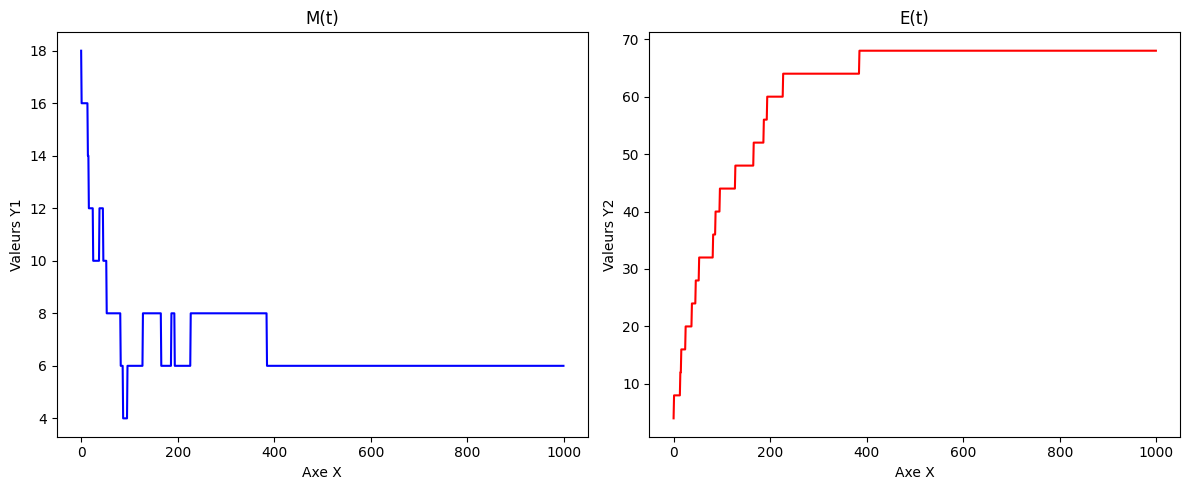

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

N = 100
J = 1
h = 0
T = 1
Nt = 1000

spins = (np.random.randint(2, size = N) -0.5)*2

def E(J : float, h : float, spins : np.ndarray) -> float:
  return -J*( np.sum(spins[:-1]*spins[1:]) + spins[0]*spins[-1] ) - h*np.sum(spins) # le terme spins[0]*spins[-1] pour la PBC

def M(spins : np.ndarray) -> float:
  return np.sum(spins)

def Z(E : float, T : float) -> float:
  return np.exp(-E/T) # k_B = 1

def dE(spins : np.ndarray, i : int) -> float:
  return 2*J*spins[i]*(spins[i-1] + spins[(i+1)%N])

M_list, E_list = [], []
for t in range(Nt) :
  i = np.random.randint(N)
  if Z(dE(spins, i),T) < np.random.rand() :
    spins[i] = -spins[i]
  M_list.append(M(spins))
  E_list.append(E(J,h,spins))

plot2(np.arange(Nt), M_list, E_list, "M(t)", "E(t)")
